# To predict the survival of Titanic Passenger

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
df=pd.read_csv('titanic_train.csv')
df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#lets drop columns which are not much importance like name ,ticket and cabin
cols=['Name','Ticket','Cabin']
df=df.drop(cols,axis=1)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
df.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [8]:
#now convert sex and embarked into integer form
dummies=[]
cols=['Sex','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [9]:
titanic_df=pd.concat(dummies,axis=1)

In [10]:
titanic_df.head()

,female,male,C,Q,S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [11]:
df=pd.concat((df,titanic_df),axis=1)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [13]:
#now drop columns sex and embarked
df=df.drop(['Sex','Embarked'],axis=1)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


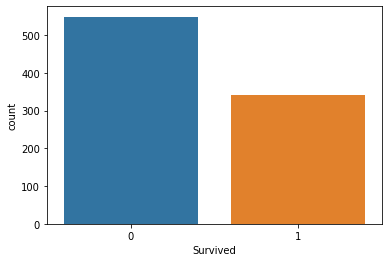

In [15]:
sns.countplot(df['Survived'],label='Count')

In [16]:
df.groupby('female')[['Survived']].mean()

,Survived
female,
0,0.188908
1,0.742038


In [17]:
df.groupby('male')[['Survived']].mean()  

,Survived
male,
0,0.742038
1,0.188908


In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

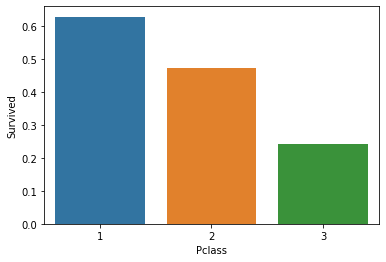

In [19]:
sns.barplot(x='Pclass',y='Survived',data=df,ci=None)

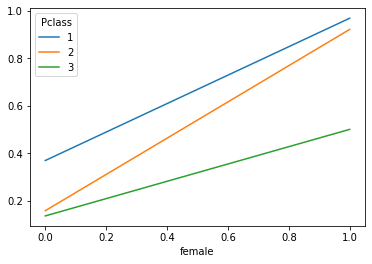

In [20]:
df.pivot_table('Survived',index='female',columns='Pclass').plot()

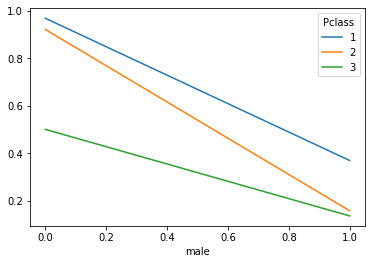

In [21]:
df.pivot_table('Survived',index='male',columns='Pclass').plot()

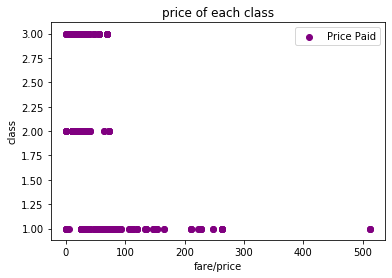

In [22]:
# prices paid by each class
import matplotlib.pyplot as plt
plt.scatter(df['Fare'],df['Pclass'],color='purple',label='Price Paid')
plt.ylabel('class')
plt.xlabel('fare/price')
plt.title('price of each class')
plt.legend()
plt.show()

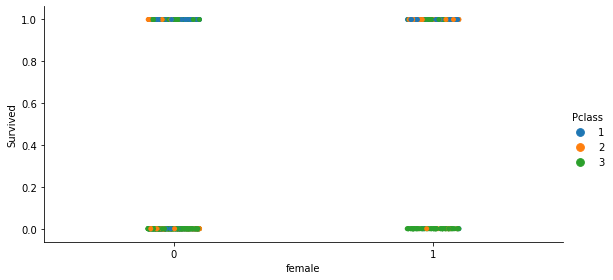

In [23]:
sns.catplot('female','Survived',hue='Pclass',height=4,aspect=2,data=df)

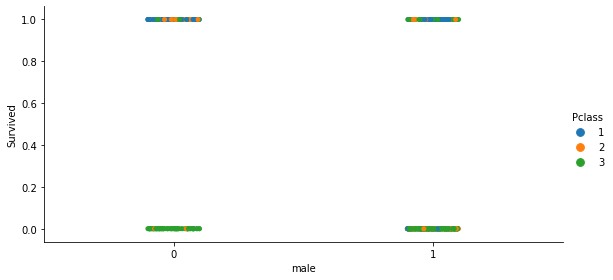

In [24]:
sns.catplot('male','Survived',hue='Pclass',height=4,aspect=2,data=df)

In [25]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [26]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


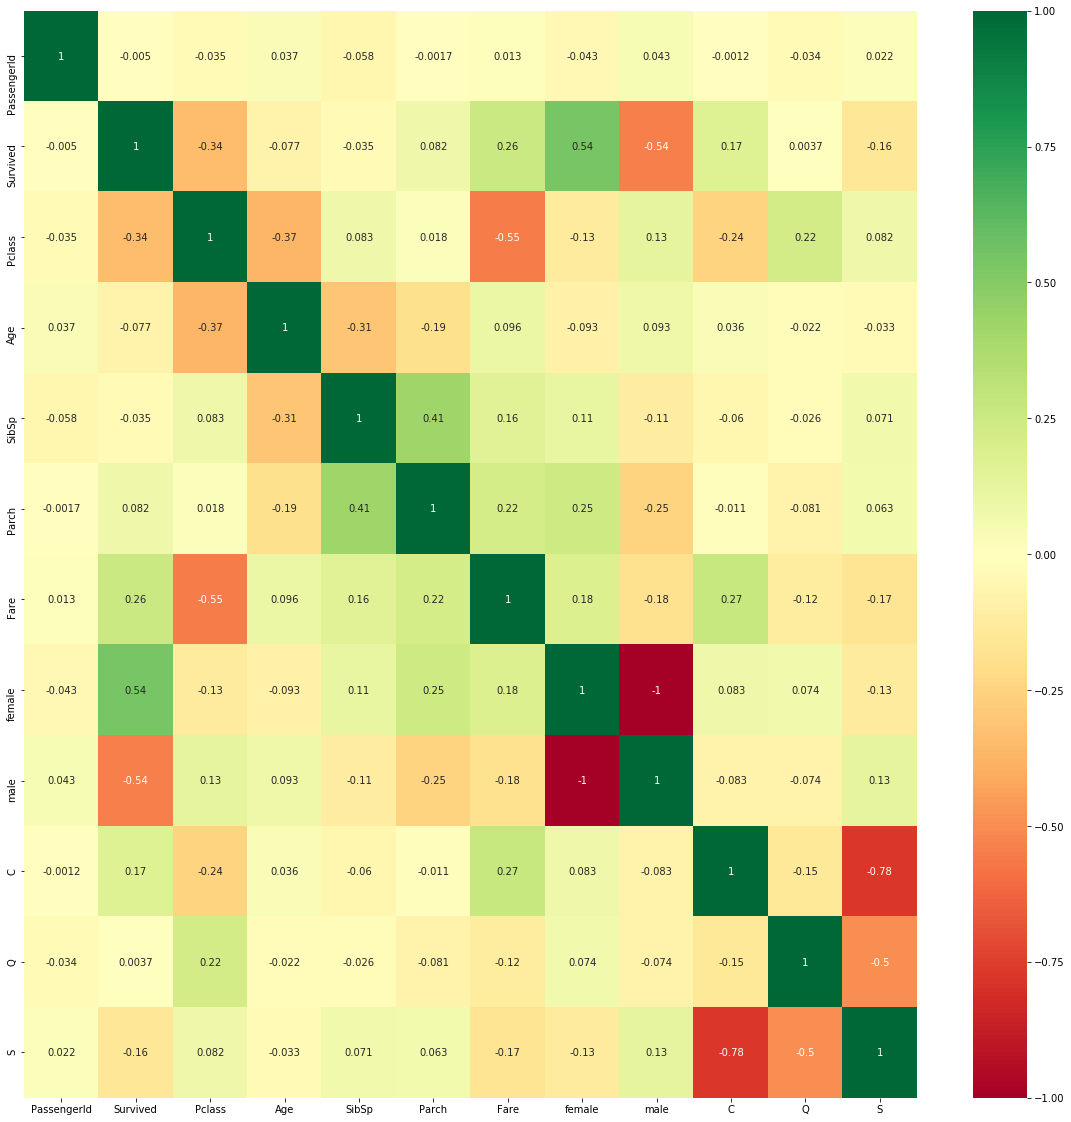

In [27]:
top_corr_features=df.corr().index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
female           0
male             0
C                0
Q                0
S                0
dtype: int64

In [29]:
df['Age']=df['Age'].interpolate()

In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [31]:
#its time for preparing the model for machine learning
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'female', 'male', 'C', 'Q', 'S'],
      dtype='object')

In [32]:
x=df.loc[:,['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'female', 'male', 'C', 'Q', 'S']]

In [33]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [34]:
y=df.iloc[:,1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
#lets start with the simple decision tree classifier
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=5)
clf.fit(x_train,y_train)
y_preddtc=clf.predict(x_test)
clf.score(x_test,y_test)

0.7910447761194029

In [37]:
clf.feature_importances_

array([0.07413897, 0.14380516, 0.12669032, 0.05743406, 0.02186072,
       0.05721831, 0.50209245, 0.        , 0.        , 0.        ,
       0.01676001])

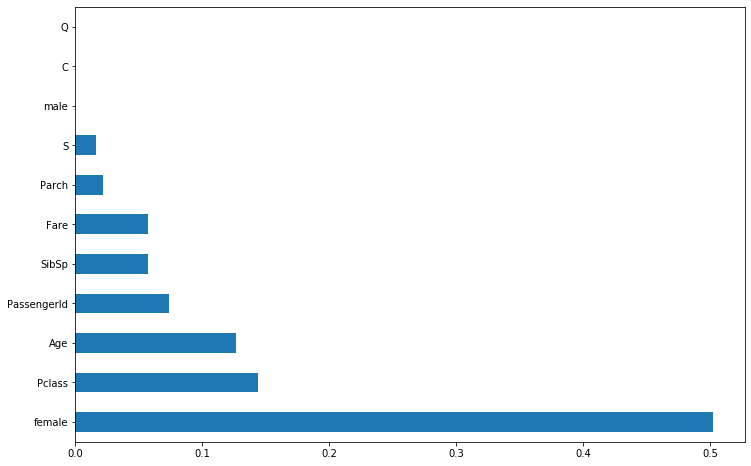

In [38]:
#plot graph of feature importances for better visualization

plt.figure(figsize=(12,8))
feat_importances=pd.Series(clf.feature_importances_,index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [39]:
#RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)
rfc.score(x_test,y_test)

0.8022388059701493

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1]


In [41]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8022388059701493
[[143  25]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.72      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [42]:
print(accuracy_score(y_test,y_preddtc)) # for dtc
print(confusion_matrix(y_test,y_preddtc))
print(classification_report(y_test,y_preddtc))

0.7910447761194029
[[144  24]
 [ 32  68]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.74      0.68      0.71       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [43]:
print(accuracy_score(y_test,y_predrfc)) # for rfc
print(confusion_matrix(y_test,y_predrfc))
print(classification_report(y_test,y_predrfc))

0.8022388059701493
[[140  28]
 [ 25  75]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       168
           1       0.73      0.75      0.74       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [44]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()  # USED only for binary
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,pred))


0.7873134328358209
[[135  33]
 [ 24  76]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.72      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [45]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# support vector classifier
svc=SVC()
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6292134831460674
0.6604477611940298
[[166   2]
 [ 89  11]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.78       168
           1       0.85      0.11      0.19       100

    accuracy                           0.66       268
   macro avg       0.75      0.55      0.49       268
weighted avg       0.72      0.66      0.56       268



In [47]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6194029850746269
[[133  35]
 [ 67  33]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       168
           1       0.49      0.33      0.39       100

    accuracy                           0.62       268
   macro avg       0.58      0.56      0.56       268
weighted avg       0.60      0.62      0.60       268



In [48]:
for k in range(25):
    k_value=k+1
    knn=KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('accuracy score is',accuracy_score(y_test,y_pred),'at k-value',k_value)

accuracy score is 0.6380597014925373 at k-value 1
accuracy score is 0.7014925373134329 at k-value 2
accuracy score is 0.6567164179104478 at k-value 3
accuracy score is 0.6604477611940298 at k-value 4
accuracy score is 0.6194029850746269 at k-value 5
accuracy score is 0.6567164179104478 at k-value 6
accuracy score is 0.6417910447761194 at k-value 7
accuracy score is 0.6902985074626866 at k-value 8
accuracy score is 0.6716417910447762 at k-value 9
accuracy score is 0.6940298507462687 at k-value 10
accuracy score is 0.6902985074626866 at k-value 11
accuracy score is 0.6865671641791045 at k-value 12
accuracy score is 0.6865671641791045 at k-value 13
accuracy score is 0.6977611940298507 at k-value 14
accuracy score is 0.6753731343283582 at k-value 15
accuracy score is 0.6865671641791045 at k-value 16
accuracy score is 0.6865671641791045 at k-value 17
accuracy score is 0.6940298507462687 at k-value 18
accuracy score is 0.6902985074626866 at k-value 19
accuracy score is 0.6940298507462687 at 

In [49]:
from sklearn.tree import DecisionTreeClassifier
def decisiontree(cr):
    dtc=DecisionTreeClassifier(criterion=cr)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    print(accuracy_score(y_test,preddtc))
    print(confusion_matrix(y_test,preddtc))
    print(classification_report(y_test,preddtc))

In [50]:
decisiontree('gini')

0.75
[[133  35]
 [ 32  68]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       168
           1       0.66      0.68      0.67       100

    accuracy                           0.75       268
   macro avg       0.73      0.74      0.73       268
weighted avg       0.75      0.75      0.75       268



In [51]:
decisiontree('entropy')

0.7649253731343284
[[136  32]
 [ 31  69]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       168
           1       0.68      0.69      0.69       100

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.76      0.77       268



In [52]:
#lets use gradientboosting to increase score
#among all random forest classifier has highest score
from sklearn import ensemble
gdb=ensemble.GradientBoostingClassifier()
gdb.fit(x_train,y_train)
gdb.score(x_test,y_test)

0.8134328358208955

In [53]:
#lets tune to get max score
max_score=0.81343
for k in range(45,56):
    gdbt=ensemble.GradientBoostingClassifier(n_estimators=k)
    gdbt.fit(x_train,y_train)
    score=gdbt.score(x_test,y_test)
    if score>max_score:
        max_score=score
        final_n_estimators=k
print("max_score for",final_n_estimators,'is',max_score)

max_score for 45 is 0.832089552238806


In [54]:
#so take k=45
gd=ensemble.GradientBoostingClassifier(n_estimators=45)
gd.fit(x_train,y_train)
score=gd.score(x_test,y_test)
print(score)

0.832089552238806


In [56]:
#lets save this model
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(gd,'titanic.pkl')

['titanic.pkl']